In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
##to check null values and place them with true if null, and finally counting all the
# true values to find the number of null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

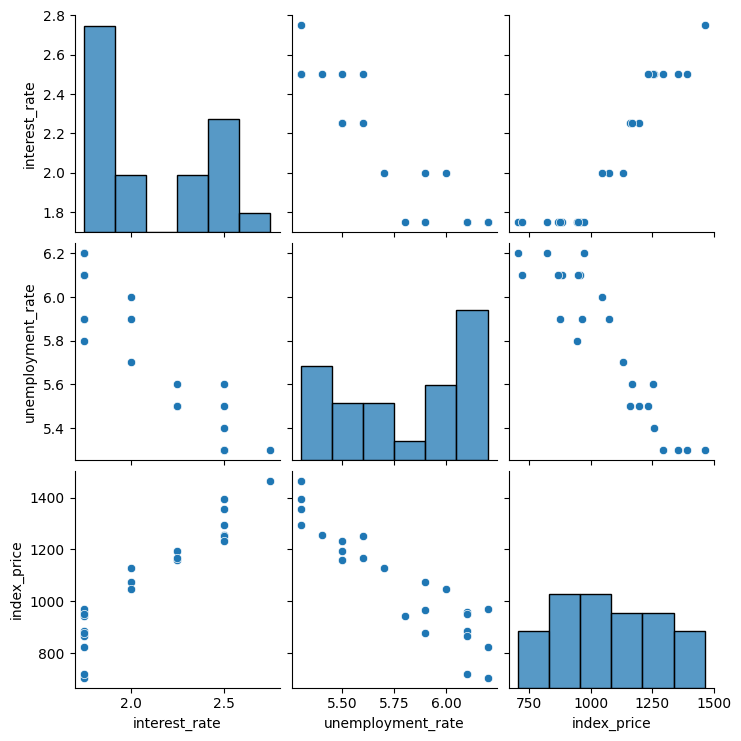

In [7]:
##visualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

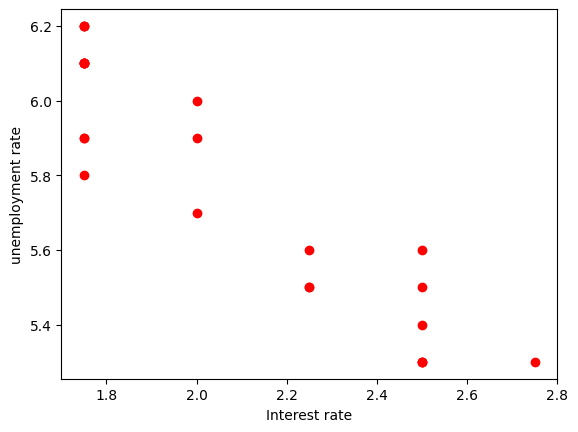

In [9]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')

In [10]:
##independent and dependent features
X=df_index[['interest_rate','unemployment_rate']] 
y=df_index['index_price'] 
# we can also write it as X=df_index.iloc[:,:-1]<-for independent
# y=df_index.iloc[:,-1]<-for dependent variable

In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)


In [12]:
##new type of plot from seaborn -->REG PLOT
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

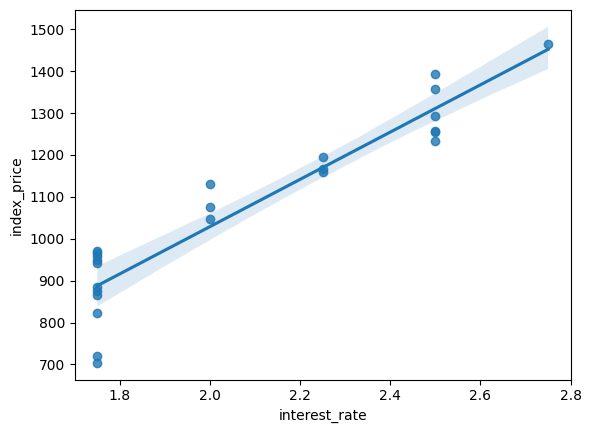

In [13]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

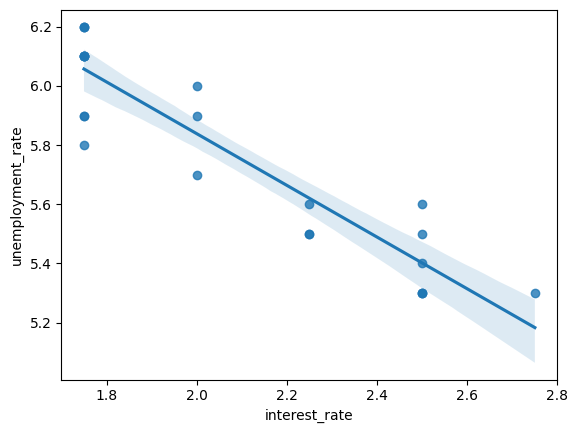

In [14]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

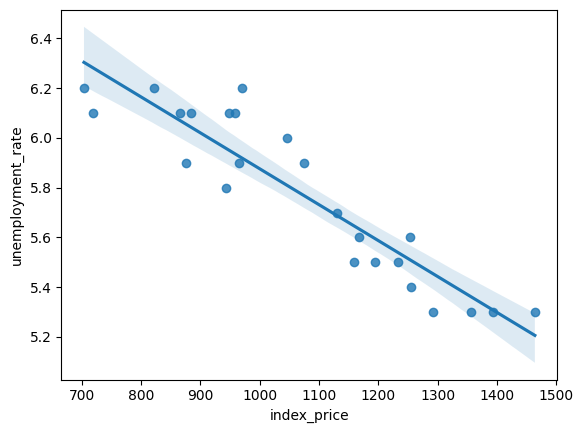

In [15]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression=LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
##cross validation -->VERY IMPORTANT
from sklearn.model_selection import cross_val_score

In [22]:
validation_score=cross_val_score(regression,X_train, y_train,scoring='neg_mean_squared_error',cv=3)

In [23]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [24]:
y_pred=regression.predict(X_test)

In [25]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [30]:
#R SQUARED VALUE
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [32]:
##ADJUSTED R SQUARED VALUE
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

##ASSUMPTIONS 
1. IF THERE EXISTS A LINEAR RELATON BETWEEN Y_TEST AND YPRED THEN ITS A GOOD THING

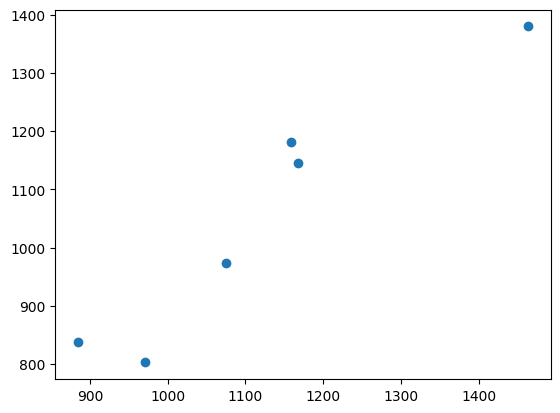

In [34]:
plt.scatter(y_test,y_pred)

In [36]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


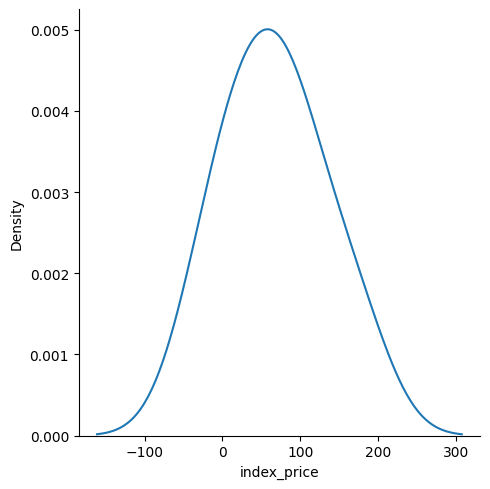

In [38]:
##plot this residuals
sns.displot(residuals,kind='kde')#<--kde plot made

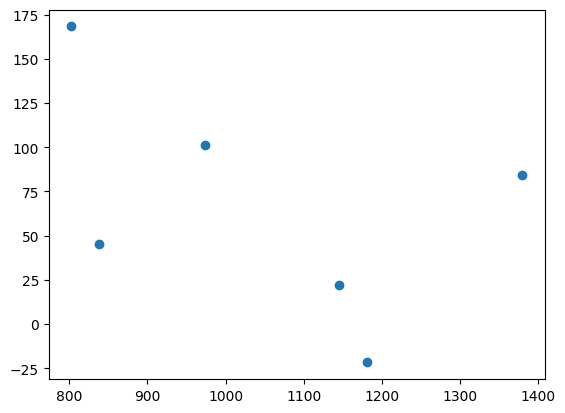

In [40]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [41]:
##using OLS
import statsmodels.api as sm

In [42]:
model=sm.OLS(y_train,X_train).fit()

In [43]:
prediction=model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [44]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                       0.754
Time:                        16:20:49   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Lenovo\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
